# Perceptron

In [41]:
from sklearn import datasets
import warnings 
warnings.filterwarnings('ignore')
import copy

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
X, y = iris.data, iris.target

In [5]:
x1, x2 = X[:,0], X[:,1]

In [6]:
(x1,x2)

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

In [7]:
import matplotlib.pyplot as plt

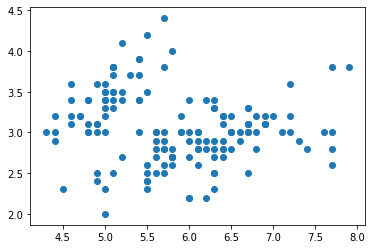

In [8]:
plt.scatter(x1,x2)

In [9]:
x1, x2 = pd.Series(x1), pd.Series(x2)

In [10]:
x1[:10]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
dtype: float64

In [11]:
df = pd.DataFrame(x1, columns= ['x1'])

In [12]:
df['x2'], df['target'] = x2, y

In [13]:
df.head()

,x1,x2,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [14]:
 df.tail()

,x1,x2,target
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2
149,5.9,3.0,2


In [15]:
random_state = 0
rgen = np.random.RandomState(random_state)
w_ = rgen.normal(loc=0.0, scale=0.01, size = 3)

In [16]:
w_

array([0.01764052, 0.00400157, 0.00978738])

In [17]:
df = df[:100]

In [18]:
df.tail()

,x1,x2,target
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1
99,5.7,2.8,1


In [19]:
w1 = []
w2 = []
b = []
i = 0
while i<100:
    w1.append(w_[0])
    w2.append(w_[1])
    b.append(w_[-1])
    
    i += 1

In [20]:
df['w1'], df['w2'], df['b'] = w1, w2,b

In [21]:
df.head()

,x1,x2,target,w1,w2,b
0,5.1,3.5,0,0.017641,0.004002,0.009787
1,4.9,3.0,0,0.017641,0.004002,0.009787
2,4.7,3.2,0,0.017641,0.004002,0.009787
3,4.6,3.1,0,0.017641,0.004002,0.009787
4,5.0,3.6,0,0.017641,0.004002,0.009787


In [22]:
df['target'] = df['target'].replace([0,1] , [-1,1])

In [23]:
df.head()

,x1,x2,target,w1,w2,b
0,5.1,3.5,-1,0.017641,0.004002,0.009787
1,4.9,3.0,-1,0.017641,0.004002,0.009787
2,4.7,3.2,-1,0.017641,0.004002,0.009787
3,4.6,3.1,-1,0.017641,0.004002,0.009787
4,5.0,3.6,-1,0.017641,0.004002,0.009787


In [24]:
predicted = []
i = 0

while i<100:
    range_ = range(0,100)
    
    for i in range_:
        y_hat = -1 * df['b'][i] + df['w1'][i] * df['x1'][i] + df['w2'][i] * df['x2'][i]
        if y_hat >=0 :
            predicted.append(1)
        else:
            predicted.append(-1)
    
    i += 1

In [25]:
df['y_hat'] = predicted

In [26]:
df.head()

,x1,x2,target,w1,w2,b,y_hat
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1


In [27]:
del_w1_update = []
eta = 0.5
del_w2_update = []
index = df.index.values

for n in index:
    del_w1 = eta * (df['target'][n] - df['y_hat'][n]) * df['x1'][n]
    del_w2 = eta * (df['target'][n] - df['y_hat'][n]) * df['x2'][n]


    del_w1_update.append(del_w1)
    del_w2_update.append(del_w2)

    n += 1



In [28]:
del_w1_update

[-5.1,
 -4.9,
 -4.7,
 -4.6,
 -5.0,
 -5.4,
 -4.6,
 -5.0,
 -4.4,
 -4.9,
 -5.4,
 -4.8,
 -4.8,
 -4.3,
 -5.8,
 -5.7,
 -5.4,
 -5.1,
 -5.7,
 -5.1,
 -5.4,
 -5.1,
 -4.6,
 -5.1,
 -4.8,
 -5.0,
 -5.0,
 -5.2,
 -5.2,
 -4.7,
 -4.8,
 -5.4,
 -5.2,
 -5.5,
 -4.9,
 -5.0,
 -5.5,
 -4.9,
 -4.4,
 -5.1,
 -5.0,
 -4.5,
 -4.4,
 -5.0,
 -5.1,
 -4.8,
 -5.1,
 -4.6,
 -5.3,
 -5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
df['update_w1'] = df['w1'] + del_w1_update
df['update_w2'] = df['w2'] + del_w2_update

In [30]:
df.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-5.082359,-3.495998
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-4.882359,-2.995998
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-4.682359,-3.195998
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-4.582359,-3.095998
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-4.982359,-3.595998


In [31]:
predicted_after_update = []
i = 0

while i<100:
    range_ = range(0,100)
    
    for i in range_:
        y_hat = -1 * df['b'][i] + df['update_w1'][i] * df['x1'][i] + df['update_w2'][i] * df['x2'][i]
        if y_hat >=0 :
            predicted_after_update.append(1)
        else:
            predicted_after_update.append(-1)
    
    i += 1

In [32]:
(predicted_after_update[:10], predicted_after_update[-10:])

([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
df['predicted after update'] = predicted_after_update

In [34]:
df.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-5.082359,-3.495998,-1
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-4.882359,-2.995998,-1
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-4.682359,-3.195998,-1
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-4.582359,-3.095998,-1
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-4.982359,-3.595998,-1


In [35]:
print('Missclassified Samples: %d' % (df['target'] != df['predicted after update']).sum())

Missclassified Samples: 0


## So, Our Model is 100% Accurate

In [36]:
X = df[['x1', 'x2']]
w = df[['update_w1', 'update_w2']]

class Perceptron(object):
    def __init__(self, X, w):
        self.X = X
        self.w = w
        
    def net_input(self):
        return np.dot(self.X, self.w) + b

    def predict(self):
        return np.where(net_input(self.X) >= 0 , 1, -1)

In [37]:
ppn = Perceptron(X,w)

In [38]:
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

NameError: name 'xx1' is not defined

In [ ]:
def net_input(X,w,b):
    return np.dot(X, w) + b

net_input(X,w,df['b'])
def predict(X):
    return np.where(net_input(X) >= 0 , 1, -1)

In [ ]:
Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [ ]:
from matplotlib.colors import ListedColormap

colors = ('r','b')
cmap = ListedColormap(colors[:2])

resolution = 0.02
x1_min, x1_max = df['x1'].min() - 1, df['x1'].max() + 1
x2_min, x2_max = df['x2'].min() - 1, df['x2'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

Z = df['predicted after update'] * (np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

In [ ]:
(np.array([xx1.ravel(), xx2.ravel()]).T)

In [ ]:
xx1

In [ ]:
xx1.ravel()

In [ ]:
x1_min, x1_max = df['x1'].min() - 1, df['x1'].max() + 1
x2_min, x2_max = df['x2'].min() - 1, df['x2'].max() + 1

In [ ]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),
                       np.arange(x2_min, x2_max))

In [ ]:
xx1, xx2

In [ ]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

In [ ]:
len(xx1)

# Adaline

In [39]:
df.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-5.082359,-3.495998,-1
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-4.882359,-2.995998,-1
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-4.682359,-3.195998,-1
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-4.582359,-3.095998,-1
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-4.982359,-3.595998,-1


In [43]:
perceptron = copy.deepcopy(df)

In [48]:
adaline = copy.deepcopy(df[['x1','x2','target','w1','w2','b', 'y_hat']])

In [49]:
adaline.head()

,x1,x2,target,w1,w2,b,y_hat
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1


In [156]:
del_update_w1 = []
del_update_w2 = []
i = 0
sum_1 = sum((adaline['target']  - adaline['y_hat']) * adaline['x1'])
sum_2 = sum((adaline['target'] - adaline['y_hat']) * adaline['x1'])
eta = 0.5
while i<100:
    del_w1 = eta * sum_1
    del_w2 = eta * sum_2
    
    del_update_w1.append(del_w1)
    del_update_w2.append(del_w2)
    
    i += 1
    
del_update_w1 = np.array(del_update_w1)
del_update_w2= np.array(del_update_w2)

In [157]:
del_update_w1.shape

(100,)

In [158]:
del_update_w1 = del_update_w1[1]

In [159]:
del_update_w2 = del_update_w2[1]

In [160]:
adaline['update_w1'], adaline['update_w2'] = del_update_w1 + adaline['w1'] , del_update_w2 + adaline['w2']

In [161]:
adaline.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update- epoch1,w1 update after epoch-2,w2 update after epoch-2
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-509.982359,0.004002
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-489.982359,0.004002
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-469.982359,0.004002
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-459.982359,0.004002
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-499.982359,0.004002


In [162]:
predicted_after_update = []
i = 0

while i<100:
    range_ = range(0,100)
    
    for i in range_:
        y_hat =  adaline['b'][i] + adaline['update_w1'][i] * adaline['x1'][i] + adaline['update_w2'][i] * adaline['x2'][i]
        if y_hat >=0 :
            predicted_after_update.append(1)
        else:
            predicted_after_update.append(-1)
    
    i += 1

In [163]:
adaline['predicted after update- epoch1'] = predicted_after_update

In [164]:
adaline.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update- epoch1,w1 update after epoch-2,w2 update after epoch-2
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-509.982359,0.004002
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-489.982359,0.004002
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-469.982359,0.004002
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-459.982359,0.004002
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-499.982359,0.004002


In [165]:
print('Missclassified Samples: %d' % (adaline['target'] != adaline['predicted after update- epoch1']).sum())

Missclassified Samples: 50


In [166]:
del_update_w1_e2 = []
del_update_w2_e2 = []
i = 0
sum_1 = sum((adaline['target']   - adaline['predicted after update- epoch1']) * adaline['x1'])
sum_2 = sum((adaline['target'] - adaline['predicted after update- epoch1']) * adaline['x1'])
eta = 0.5
while i<100:
    del_w1 = eta * sum_1
    del_w1 = eta * sum_2
    
    del_update_w1_e2.append(del_w1)
    del_update_w2_e2.append(del_w2)
    
    i += 1
    
del_update_w1_e2 = np.array(del_update_w1)
del_update_w2_e2 = np.array(del_update_w2)




In [167]:
del_update_w1_e2, del_update_w2_e2

(array(-250.3), array(-250.3))

In [169]:
i = 0
del_update_w1_e2_, del_update_w2_e2_ = [],[]
while i<100 :
    del_update_w1_e2_.append(del_update_w1_e2)
    del_update_w2_e2_.append(del_update_w2_e2)
    
    i += 1

adaline['w1 update after epoch-2'], adaline['w2 update after epoch-2'] = del_update_w1_e2_ + adaline['update_w1'], del_update_w2_e2_ + adaline['update_w2']

In [170]:
adaline.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update- epoch1,w1 update after epoch-2,w2 update after epoch-2
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998


In [171]:
predicted_after_update = []
i = 0

while i<100:
    range_ = range(0,100)
    
    for i in range_:
        y_hat = adaline['b'][i] + adaline['w1 update after epoch-2'][i] * adaline['x1'][i] + adaline['w2 update after epoch-2'][i] * adaline['x2'][i]
        if y_hat >=0 :
            predicted_after_update.append(1)
        else:
            predicted_after_update.append(-1)
    
    i += 1

In [172]:
adaline['predicted after update- epoch2'] = predicted_after_update

In [173]:
adaline.head()

,x1,x2,target,w1,w2,b,y_hat,update_w1,update_w2,predicted after update- epoch1,w1 update after epoch-2,w2 update after epoch-2,predicted after update- epoch2
0,5.1,3.5,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998,-1
1,4.9,3.0,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998,-1
2,4.7,3.2,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998,-1
3,4.6,3.1,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998,-1
4,5.0,3.6,-1,0.017641,0.004002,0.009787,1,-250.282359,-250.295998,-1,-500.582359,-500.595998,-1


In [174]:
print('Missclassified Samples: %d' % (adaline['target'] != adaline['predicted after update- epoch1']).sum())

Missclassified Samples: 50


# Logistic Regression

In [116]:
lr = adaline[['x1', 'x2', 'w1', 'w2', 'b']]

In [117]:
lr.head()

,x1,x2,w1,w2,b
0,5.1,3.5,0.017641,0.004002,0.009787
1,4.9,3.0,0.017641,0.004002,0.009787
2,4.7,3.2,0.017641,0.004002,0.009787
3,4.6,3.1,0.017641,0.004002,0.009787
4,5.0,3.6,0.017641,0.004002,0.009787


In [146]:
i = 0
z = []
x0 = 102.1763564 

while i<100:
    zi =  x0 * lr['b'][i] + lr['w1'][i] * lr['x1'][i] + lr['w2'][i] * lr['x2'][i]
    phi_z = 1 / (1 + np.exp(-zi))
    
    if phi_z >=0:
        z.append(1)
    else:
        z.append(0)
        
    i += 1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]